In [1]:
import sys, os
import numpy as np
import scipy as sp
from typing import List, Tuple, Callable, Any, Dict

from methods.PolyCG.polycg.SO3 import so3
from methods.read_nuc_data import read_nucleosome_triads, GenStiffness
from methods.free_energy import nucleosome_free_energy

np.set_printoptions(linewidth=250,precision=5,suppress=True)

### Methods

In [2]:
def read_sequences(fn: str): 
    seqs = []
    with open(fn, "r") as f:
        for line in f.readlines():
            if len(line.strip()) > 0:
                seqs.append(line.strip())
    return seqs

def histogram(data,density=True):
    bins = np.arange(np.min(data),np.max(data)+2)-0.5
    hist, edges = np.histogram(data,bins=bins,density=density)
    vals = 0.5*(edges[1:]+edges[:-1])
    return np.array((vals,hist)).T

### Load Constants

In [3]:
genstiff = GenStiffness(method='MD')

triadfn = 'methods/State/Nucleosome.state'
nuctriads = read_nucleosome_triads(triadfn)
midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]
midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 34, 38, 45, 49, 55,
    59, 65, 69, 76, 80, 86, 90, 96, 100, 107,
    111, 116, 121, 128, 131, 139, 143
]


beta = 1./4.114
     

### Calculate free energy for sequences

In [19]:
pathname = 'Data/Set3'

seqfn = pathname+'/seqs'
seqs = read_sequences(seqfn)

Fdicts = []

for seq in seqs:
    print(seq)
    stiff, gs = genstiff.gen_params(seq)
    Fdict  = nucleosome_free_energy(
        gs,
        stiff,
        midstep_constraint_locations, 
        nuctriads
    )
    Fdicts.append(Fdict)
      

ACGCCGCAGCCCGTCGACAGCGCTAGCAAGCAGTTAGGCCAATCAATCGCCGGAATGGCGACATCGAAACTTGGACGAGACTTCCATCCACAGAAGTGGCTGTGCGCTGGCAATCCCTTCGATAGAGTGGGAGATCTTATGCTAGCA
ACGCCGCAGCCCGTCGACAGCGCTAGCAAGCAGTTAGGCCAATCAATCGCCGTAATGGCGACATCGAAACTTGGACGAGACTTCCATCCACAGAAGTGGCTGTGCGCTGGCAATCCCTTCGATAGAGTGGGAGATCTTATGCTAGCA
ACGCCGCAGCCCGTCGACAGCGCTAGCAAGCAGTTAGGCCAATCAATCGCCGTAATGGCGACATCGAAACTTGGACGAGACTTCCATCCACAGAAGTGGCTGTGCGCTGGCAATCCCTTCGATAGAGTGGGAGATCTTATGCTAGGA
ACGCCGCAGCCCGTCGACAGCGCTAGCAAGCAGTTAGGCCAATCAATCGCCGTAATGGCGACATCGAAACTTGGACGAGACTTCCATCCACAGAAGTGGCTGTGCGCTGGCAATCCCTTCGATATAGTGGGAGATCTTATGCTAGGA
ACGCCGCAGCCCGTCGACAGCGCTAGCAAGCAGTTAGGCCAATCAATCGCCGTAATGGCGACATCGAAACTTGGACGAGACTTCCATCCGCAGAAGTGGCTGTGCGCTGGCAATCCCTTCGATATAGTGGGAGATCTTATGCTAGGA
ACGCCGCAGCCCTTCGACAGCGCTAGCAAGCAGTTAGGCCAATCAATCGCCGTAATGGCGACATCGAAACTTGGACGAGACTTCCATCCGCAGAAGTGGCTGTGCGCTGGCAATCCCTTCGATATAGTGGGAGATCTTATGCTAGGA
ACGCCGCAGCCCTTCGACAGCGCTAGCAAGCAGTTAGGCCAATCAATCGCCGTAATGGCGACATCGAAACTTGGACGAGACTTCCATCCGCAGAAGTGGCTGTGCGCTGGCA

### Eval Stats

In [22]:

statsfn = pathname+'/out'

stats = np.loadtxt(statsfn)
print(stats.shape)
vals = np.sort(np.unique(stats))

hist = histogram(stats,density=True)
statsfe = np.copy(hist)
statsfe[:,1] = -np.log(hist[:,1])

print(hist)
print(statsfe)



(2594012,)
[[ 0.       0.00526]
 [ 1.       0.00767]
 [ 2.       0.00451]
 [ 3.       0.00384]
 [ 4.       0.00843]
 [ 5.       0.00337]
 [ 6.       0.00685]
 [ 7.       0.00932]
 [ 8.       0.01232]
 [ 9.       0.0097 ]
 [10.       0.01529]
 [11.       0.06452]
 [12.       0.05905]
 [13.       0.12188]
 [14.       0.12206]
 [15.       0.05778]
 [16.       0.02519]
 [17.       0.03144]
 [18.       0.04245]
 [19.       0.04617]
 [20.       0.03305]
 [21.       0.0312 ]
 [22.       0.07353]
 [23.       0.04642]
 [24.       0.0105 ]
 [25.       0.01461]
 [26.       0.00667]
 [27.       0.00823]
 [28.       0.01871]
 [29.       0.01498]
 [30.       0.02832]
 [31.       0.01439]
 [32.       0.01442]
 [33.       0.01021]
 [34.       0.01272]
 [35.       0.00495]]
[[ 0.       5.24744]
 [ 1.       4.87074]
 [ 2.       5.40154]
 [ 3.       5.56319]
 [ 4.       4.77598]
 [ 5.       5.69145]
 [ 6.       4.983  ]
 [ 7.       4.67506]
 [ 8.       4.39648]
 [ 9.       4.63547]
 [10.       4.18067]
 

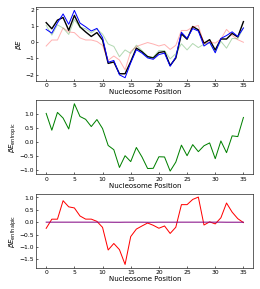

In [23]:
savefn = pathname+'/fig'

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8.6/2.54,10./2.54))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)


Ftots = np.array([Fdict['F'] for Fdict in Fdicts])
Fcnst = np.array([Fdict['F_const'] for Fdict in Fdicts])
Fentr = np.array([Fdict['F_entropy']+Fdict['F_jacob'] for Fdict in Fdicts])
Fjaco = np.array([Fdict['F_jacob'] for Fdict in Fdicts])

Ftots_rel = Ftots - np.mean(Ftots)
Fcnst_rel = Fcnst - np.mean(Fcnst)
Fentr_rel = Fentr - np.mean(Fentr)
Fjaco_rel = Fjaco - np.mean(Fjaco)
    
Epos   = np.arange(len(Ftots_rel))
ax1.plot(Epos,Ftots_rel,lw=1,color='blue',zorder=2)
ax2.plot(Epos,Fentr_rel,lw=1,color='green')
ax3.plot(Epos,Fcnst_rel,lw=1,color='red')
ax3.plot(Epos,Fjaco_rel,lw=1,color='purple')

ax1.plot(Epos,Fcnst_rel,lw=1,color='red',alpha=0.3,zorder=1)
ax1.plot(Epos,Fentr_rel,lw=1,color='green',alpha=0.3,zorder=1)

ax1.plot(statsfe[:,0],(statsfe[:,1]-np.mean(statsfe[:,1])),lw=1.4,color='black',zorder=0)

tick_pad            = 2
axlinewidth         = 0.9
axtick_major_width  = 0.6
axtick_major_length = 1.6
tick_labelsize      = 6
label_fontsize      = 7

ax1.set_xlabel('Nucleosome Position',size = label_fontsize,labelpad=1)
ax1.set_ylabel(r'$\beta E$',size = label_fontsize,labelpad=1)
ax2.set_xlabel('Nucleosome Position',size = label_fontsize,labelpad=1)
ax2.set_ylabel(r'$\beta E_{\mathrm{entropic}}$',size = label_fontsize,labelpad=1)
ax3.set_xlabel('Nucleosome Position',size = label_fontsize,labelpad=1)
ax3.set_ylabel(r'$\beta E_{\mathrm{enthalpic}}$',size = label_fontsize,labelpad=1)

ax1.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad)
ax2.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad)
ax3.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad)
    
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.7)
    ax2.spines[axis].set_linewidth(0.7)
    ax3.spines[axis].set_linewidth(0.7)
    


plt.subplots_adjust(
    left=0.09,
    right=0.98,
    bottom=0.06,
    top=0.98,
    wspace=0.2,
    hspace=0.26)


plt.savefig(savefn + '.png',dpi=300,facecolor='white')
plt.show()
# plt.close()

    